In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

In [2]:
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v1.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
data = df.copy()

In [23]:
dataset = pd.read_excel('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v5.xlsx')
dataset.head()

,Foldername,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],...,romberg_EyesOpen_SwayDensity,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,Frailty_Score,Frailty_State
0,DUP002BME,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,...,29.84,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,7,0
1,FRA001AMA,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,29.80,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,4,1
2,FRA002CTI,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.80,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,9,0
3,FRA003BMG,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,30.44,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,7,0
4,FRA004LHN,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.88,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,8,0


In [24]:
# Drop AVG_CONFIDENCE column
dataset.drop(['AVG_CONFIDENCE'], axis=1, inplace=True)
dataset.head()

,Foldername,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],...,romberg_EyesOpen_SwayDensity,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,Frailty_Score,Frailty_State
0,DUP002BME,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,...,29.84,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,7,0
1,FRA001AMA,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,29.80,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,4,1
2,FRA002CTI,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.80,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,9,0
3,FRA003BMG,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,30.44,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,7,0
4,FRA004LHN,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.88,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,8,0


In [6]:
# save the data as a csv file
#data.to_csv('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v5.csv', index=False)

In [3]:
# Categories of features in the dataset

categories = [
    'MFESCALE',
    'VINCQ',
    'ABILYCARE',
    'SPPB',
    'FROPCOM0004',
    'FROPCOM',
    'ICOPE',
    'EPICE',
    'SAPAS',
    'FRAGIRE',
    'SF36',
    'HADS',
    'MMSE',
    'MNA',
    'VINICODEX',
    'EXAMCLIN',
    'ACUITEVISUELLE',
    'HHIE',
    'RETRAITE',
    'DOMAINE',
    'EDUCATION',
    'Frailty'
]

# Gait features 
gait_features = [
    'AvgSpeed', 'CycleVariability', 'DoubleStance', 'MeanStepDuration','RoliTronc', 'Smo_Ent_AccXWaist', 'Smo_Ent_AccYWaist','Smo_Ent_AccZWaist', 'Smo_Ent_GyrXWaist','Smo_Ent_GyrYWaist','Smo_Ent_GyrZWaist', 'Smo_ROM_anML', 'Spr_SteT', 'Spr_SwT_L','Spr_SwT_R', 'Spr_UtrT', 'Sta_Att_aAP','Sta_Att_aML', 'Sta_Att_gAP','Sta_Att_gCC', 'Sta_Att_gML', 'Sta_Lyap_AccXWaist','Sta_Lyap_AccYWaist', 'Sta_Lyap_AccZWaist', 'Sta_Lyap_GyrXWaist','Sta_Lyap_GyrYWaist', 'Sta_Lyap_GyrZWaist', 'Sta_RMS_aML_LB','Sta_RMS_gAP_LB', 'Sta_ROM_lML', 'Ste_FFTqaAP_LB', 'Ste_FFTqaCC_LB','Ste_FFTqaML_LB', 'Ste_FFTqgAP_LB', 'Ste_FFTqgCC_LB', 'Ste_FFTqgML_LB','Ste_P2_aAP_LB2', 'Ste_P2_aCC_LB2', 'Ste_cvSwT_L', 'Ste_cvSwT_R','Ste_cvT', 'Stu_L', 'Stu_RMS_aAPF', 'Stu_RMS_aCCF', 'Stu_turnN','SwingMeanStrideDuration', 'Sym_HRaAP_LB', 'Sym_HRaCC_LB',
    'Sym_P1P2_aAP_LB2', 'Sym_P1P2_aCC_LB2', 'Syn_dsT', 'Syn_ffT',
    'Springiness', 'Sturdiness', 'Smoothness', 'Steadiness', 'Stability','Symmetry', 'Synchronisation', 'Average Speed', 'StrT', 'sd_StrT','UTurn', 'sd_UTurn', 'SteL', 'sd_SteL', 'SPARC', 'sd_SPARC', 'LDLAcc','sd_LDLAcc', 'CVStrT', 'sd_CVStrT', 'CVdsT', 'sd_CVdsT', 'P1_aCC','sd_P1_aCC', 'P2_aCC', 'sd_P2_aCC', 'ML_RMS', 'sd_ML_RMS', 'P1P2',
    'sd_P1P2', 'MSwTR', 'sd_MSwTR', 'AP_HR', 'sd_AP_HR', 'ML_HR',
    'sd_ML_HR', 'CC_HR', 'sd_CC_HR', 'dstT', 'sd_dstT', 'V', 'sd_V']

# Posture features
posture_features = [
    'mean_value_ML_YF', 'mean_value_AP_YF', 'mean_distance_ML_YF',
    'mean_distance_AP_YF','mean_distance_Radius_YF', 'maximal_distance_ML_YF','maximal_distance_AP_YF', 'maximal_distance_Radius_YF', 'rms_ML_YF',
    'rms_AP_YF', 'rms_Radius_YF', 'range_ML_YF', 'range_AP_YF',
    'range_ML_AND_AP_YF', 'range_ratio_ML_AND_AP_YF',
    'planar_deviation_ML_AND_AP_YF','coefficient_sway_direction_ML_AND_AP_YF',
    'confidence_ellipse_area_ML_AND_AP_YF','principal_sway_direction_ML_AND_AP_YF', 'mean_velocity_ML_YF',
    'mean_velocity_AP_YF', 'mean_velocity_ML_AND_AP_YF',
    'sway_area_per_second_ML_AND_AP_YF', 'phase_plane_parameter_ML_YF', 'phase_plane_parameter_AP_YF', 'LFS_ML_AND_AP_YF','fractal_dimension_ML_AND_AP_YF','zero_crossing_SPD_ML_YF','peak_velocity_pos_SPD_ML_YF', 'peak_velocity_neg_SPD_ML_YF','peak_velocity_all_SPD_ML_YF', 'zero_crossing_SPD_AP_YF','peak_velocity_pos_SPD_AP_YF', 'peak_velocity_neg_SPD_AP_YF','peak_velocity_all_SPD_AP_YF', 'mean_peak_Sway_Density_YF','mean_distance_peak_Sway_Density_YF', 'mean_frequency_ML_YF',
    'mean_frequency_AP_YF', 'mean_frequency_ML_AND_AP_YF',
    'total_power_Power_Spectrum_Density_ML_YF',
    'total_power_Power_Spectrum_Density_AP_YF',
    'power_frequency_50_Power_Spectrum_Density_ML_YF',
    'power_frequency_50_Power_Spectrum_Density_AP_YF',
    'power_frequency_95_Power_Spectrum_Density_ML_YF',
    'power_frequency_95_Power_Spectrum_Density_AP_YF',
    'frequency_mode_Power_Spectrum_Density_ML_YF',
    'frequency_mode_Power_Spectrum_Density_AP_YF',
    'centroid_frequency_Power_Spectrum_Density_ML_YF',
    'centroid_frequency_Power_Spectrum_Density_AP_YF',
    'frequency_dispersion_Power_Spectrum_Density_ML_YF',
    'frequency_dispersion_Power_Spectrum_Density_AP_YF',
    'energy_content_below_05_Power_Spectrum_Density_ML_YF',
    'energy_content_below_05_Power_Spectrum_Density_AP_YF', 'energy_content_05_2_Power_Spectrum_Density_ML_YF',
    'energy_content_05_2_Power_Spectrum_Density_AP_YF',
    'energy_content_above_2_Power_Spectrum_Density_ML_YF',
    'energy_content_above_2_Power_Spectrum_Density_AP_YF',
    'frequency_quotient_Power_Spectrum_Density_ML_YF',
    'frequency_quotient_Power_Spectrum_Density_AP_YF',
    'short_time_diffusion_Diffusion_ML_YF',
    'long_time_diffusion_Diffusion_ML_YF', 'critical_time_Diffusion_ML_YF',
    'critical_displacement_Diffusion_ML_YF',
    'short_time_scaling_Diffusion_ML_YF',
    'long_time_scaling_Diffusion_ML_YF',
    'short_time_diffusion_Diffusion_AP_YF',
    'long_time_diffusion_Diffusion_AP_YF', 'critical_time_Diffusion_AP_YF',
    'critical_displacement_Diffusion_AP_YF',
    'short_time_scaling_Diffusion_AP_YF',
    'long_time_scaling_Diffusion_AP_YF', 'mean_value_ML_YO',
    'mean_value_AP_YO', 'mean_distance_ML_YO', 'mean_distance_AP_YO',
    'mean_distance_Radius_YO', 'maximal_distance_ML_YO',
    'maximal_distance_AP_YO', 'maximal_distance_Radius_YO', 'rms_ML_YO','rms_AP_YO', 'rms_Radius_YO', 'range_ML_YO', 'range_AP_YO','range_ML_AND_AP_YO', 'range_ratio_ML_AND_AP_YO',
    'planar_deviation_ML_AND_AP_YO',
    'coefficient_sway_direction_ML_AND_AP_YO',
    'confidence_ellipse_area_ML_AND_AP_YO',
    'principal_sway_direction_ML_AND_AP_YO', 'mean_velocity_ML_YO',
    'mean_velocity_AP_YO', 'mean_velocity_ML_AND_AP_YO',
    'sway_area_per_second_ML_AND_AP_YO', 'phase_plane_parameter_ML_YO',
    'phase_plane_parameter_AP_YO', 'LFS_ML_AND_AP_YO',
    'fractal_dimension_ML_AND_AP_YO', 'zero_crossing_SPD_ML_YO',
    'peak_velocity_pos_SPD_ML_YO', 'peak_velocity_neg_SPD_ML_YO',
    'peak_velocity_all_SPD_ML_YO', 'zero_crossing_SPD_AP_YO',
    'peak_velocity_pos_SPD_AP_YO', 'peak_velocity_neg_SPD_AP_YO',
    'peak_velocity_all_SPD_AP_YO', 'mean_peak_Sway_Density_YO',
    'mean_distance_peak_Sway_Density_YO', 'mean_frequency_ML_YO',
    'mean_frequency_AP_YO', 'mean_frequency_ML_AND_AP_YO',
    'total_power_Power_Spectrum_Density_ML_YO',
    'total_power_Power_Spectrum_Density_AP_YO',
    'power_frequency_50_Power_Spectrum_Density_ML_YO',
    'power_frequency_50_Power_Spectrum_Density_AP_YO',
    'power_frequency_95_Power_Spectrum_Density_ML_YO',
    'power_frequency_95_Power_Spectrum_Density_AP_YO',
    'frequency_mode_Power_Spectrum_Density_ML_YO',
    'frequency_mode_Power_Spectrum_Density_AP_YO',
    'centroid_frequency_Power_Spectrum_Density_ML_YO',
    'centroid_frequency_Power_Spectrum_Density_AP_YO',
    'frequency_dispersion_Power_Spectrum_Density_ML_YO',
    'frequency_dispersion_Power_Spectrum_Density_AP_YO',
    'energy_content_below_05_Power_Spectrum_Density_ML_YO',
    'energy_content_below_05_Power_Spectrum_Density_AP_YO',
    'energy_content_05_2_Power_Spectrum_Density_ML_YO',
    'energy_content_05_2_Power_Spectrum_Density_AP_YO',
    'energy_content_above_2_Power_Spectrum_Density_ML_YO',
    'energy_content_above_2_Power_Spectrum_Density_AP_YO',
    'frequency_quotient_Power_Spectrum_Density_ML_YO',
    'frequency_quotient_Power_Spectrum_Density_AP_YO',
    'short_time_diffusion_Diffusion_ML_YO',
    'long_time_diffusion_Diffusion_ML_YO', 'critical_time_Diffusion_ML_YO',
    'critical_displacement_Diffusion_ML_YO',
    'short_time_scaling_Diffusion_ML_YO',
    'long_time_scaling_Diffusion_ML_YO',
    'short_time_diffusion_Diffusion_AP_YO',
    'long_time_diffusion_Diffusion_AP_YO', 'critical_time_Diffusion_AP_YO',
    'critical_displacement_Diffusion_AP_YO',
    'short_time_scaling_Diffusion_AP_YO',
    'long_time_scaling_Diffusion_AP_YO'
    ]



In [4]:
# slicing the dataset into sub-datasets based on the categories
sub_datasets = {}
for category in categories:
    if category == 'FROPCOM':
        # Include all columns starting with FROPCOM but not FROPCOM0004
        sub_datasets[category] = data[[col for col in data.columns if col.startswith('FROPCOM') and not col.startswith('FROPCOM0004')]]
    elif category == 'FROPCOM0004':
        # include only the columns starting with FROPCOM0004
        sub_datasets[category] = data[[col for col in data.columns if col.startswith('FROPCOM0004')]]
    else:
        # Include all columns starting with the category name
        sub_datasets[category] = data[[col for col in data.columns if col.startswith(category)]]
    

# Slicing the shape of each sub-dataset to verify the slicing
sub_dataset_shapes = {category: sub_data.shape for category, sub_data in sub_datasets.items()}
sub_dataset_shapes

{'MFESCALE': (97, 14),
 'VINCQ': (97, 13),
 'ABILYCARE': (97, 2),
 'SPPB': (97, 7),
 'FROPCOM0004': (97, 552),
 'FROPCOM': (97, 59),
 'ICOPE': (97, 10),
 'EPICE': (97, 10),
 'SAPAS': (97, 8),
 'FRAGIRE': (97, 20),
 'SF36': (97, 36),
 'HADS': (97, 14),
 'MMSE': (97, 31),
 'MNA': (97, 10),
 'VINICODEX': (97, 11),
 'EXAMCLIN': (97, 6),
 'ACUITEVISUELLE': (97, 12),
 'HHIE': (97, 11),
 'RETRAITE': (97, 10),
 'DOMAINE': (97, 63),
 'EDUCATION': (97, 41),
 'Frailty': (97, 2)}

In [5]:
# Get sub-datasets from categories
mfescale = sub_datasets['MFESCALE']
vincq = sub_datasets['VINCQ']
abilycare = sub_datasets['ABILYCARE']
sppb = sub_datasets['SPPB']
medicaments = sub_datasets['FROPCOM0004']
fropcom = sub_datasets['FROPCOM']
icope = sub_datasets['ICOPE']
epice = sub_datasets['EPICE']
sapas = sub_datasets['SAPAS']
fragire = sub_datasets['FRAGIRE']
sf36 = sub_datasets['SF36']
hads = sub_datasets['HADS']
mmse = sub_datasets['MMSE']
mna = sub_datasets['MNA']
vinicodex = sub_datasets['VINICODEX']
examclin = sub_datasets['EXAMCLIN']
acuitevisuelle = sub_datasets['ACUITEVISUELLE']
hhie = sub_datasets['HHIE']
retraite = sub_datasets['RETRAITE']
domaine = sub_datasets['DOMAINE']
education = sub_datasets['EDUCATION']
frailty = sub_datasets['Frailty']


In [6]:
# sub_dataset with gait features
gait_sub_dataset = data[gait_features] 

# sub_dataset with posture features
posture_sub_dataset = data[posture_features]

# sub_dataset with gait and posture features
gait_posture_sub_dataset = data[gait_features + posture_features]

# shapes of the sub-datasets
print('Shape of the gait sub-dataset: ', gait_sub_dataset.shape)
print('Shape of the posture sub-dataset: ', posture_sub_dataset.shape)
print('Shape of the gait and posture sub-dataset: ', gait_posture_sub_dataset.shape)


Shape of the gait sub-dataset:  (97, 94)
Shape of the posture sub-dataset:  (97, 144)
Shape of the gait and posture sub-dataset:  (97, 238)


In [7]:
# Drop columns of 'RETRAITE', 'DOMAINE', 'EDUCATION' from the main dataset
data.drop(sub_datasets['RETRAITE'].columns, axis=1, inplace=True)
data.drop(sub_datasets['DOMAINE'].columns, axis=1, inplace=True)
data.drop(sub_datasets['EDUCATION'].columns, axis=1, inplace=True)


# Remove the columns of 'RETRAITE', 'DOMAINE', 'EDUCATION' from the sub_datasets dictionary
del sub_datasets['RETRAITE']
del sub_datasets['DOMAINE']
del sub_datasets['EDUCATION']

# Shape of the main dataset
print('Shape of the main dataset: ', data.shape)

Shape of the main dataset:  (97, 1070)


In [8]:
sub_datasets.keys()

dict_keys(['MFESCALE', 'VINCQ', 'ABILYCARE', 'SPPB', 'FROPCOM0004', 'FROPCOM', 'ICOPE', 'EPICE', 'SAPAS', 'FRAGIRE', 'SF36', 'HADS', 'MMSE', 'MNA', 'VINICODEX', 'EXAMCLIN', 'ACUITEVISUELLE', 'HHIE', 'Frailty'])

## MFESCALE ANALYSIS  
Find the Average confidence.

In [13]:
mfescale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MFESCALE000[SQ001]  88 non-null     float64
 1   MFESCALE000[SQ002]  87 non-null     float64
 2   MFESCALE000[SQ003]  88 non-null     float64
 3   MFESCALE000[SQ004]  88 non-null     float64
 4   MFESCALE000[SQ005]  87 non-null     float64
 5   MFESCALE000[SQ006]  88 non-null     float64
 6   MFESCALE000[SQ007]  87 non-null     float64
 7   MFESCALE000[SQ008]  88 non-null     float64
 8   MFESCALE000[SQ009]  88 non-null     float64
 9   MFESCALE000[SQ010]  87 non-null     float64
 10  MFESCALE000[SQ011]  51 non-null     float64
 11  MFESCALE000[SQ012]  88 non-null     float64
 12  MFESCALE000[SQ013]  86 non-null     float64
 13  MFESCALE000[SQ014]  86 non-null     float64
dtypes: float64(14)
memory usage: 10.7 KB


In [10]:
# mfescale
mfescale.head(10)

,MFESCALE000[SQ001],MFESCALE000[SQ002],MFESCALE000[SQ003],MFESCALE000[SQ004],MFESCALE000[SQ005],MFESCALE000[SQ006],MFESCALE000[SQ007],MFESCALE000[SQ008],MFESCALE000[SQ009],MFESCALE000[SQ010],MFESCALE000[SQ011],MFESCALE000[SQ012],MFESCALE000[SQ013],MFESCALE000[SQ014]
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,6.0,6.0,10.0,10.0,8.0,10.0,10.0,9.0,10.0,10.0,4.0,10.0,10.0,10.0
2,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
5,8.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,9.0,NaN,8.0,10.0,8.0
6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0
7,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0
8,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0,10.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Total score for each patient if the patient has NaN values in every column, then the total score is NaN
mfescale['MFESCALE_SCORE'] = mfescale.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)
mfescale.head(10)


C:\Users\matth\AppData\Local\Temp\ipykernel_10488\769193882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfescale['MFESCALE_SCORE'] = mfescale.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)


,MFESCALE000[SQ001],MFESCALE000[SQ002],MFESCALE000[SQ003],MFESCALE000[SQ004],MFESCALE000[SQ005],MFESCALE000[SQ006],MFESCALE000[SQ007],MFESCALE000[SQ008],MFESCALE000[SQ009],MFESCALE000[SQ010],MFESCALE000[SQ011],MFESCALE000[SQ012],MFESCALE000[SQ013],MFESCALE000[SQ014],MFESCALE_SCORE
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,140.0
1,6.0,6.0,10.0,10.0,8.0,10.0,10.0,9.0,10.0,10.0,4.0,10.0,10.0,10.0,123.0
2,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,135.0
3,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,129.0
4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,140.0
5,8.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,9.0,NaN,8.0,10.0,8.0,121.0
6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,130.0
7,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,130.0
8,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0,10.0,119.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# mfescale + data[['Frailty_Score', 'Frailty_State']]
mfescale_plus = mfescale.join(data[['Foldername']])
mfescale_plus.head(10)

,MFESCALE000[SQ001],MFESCALE000[SQ002],MFESCALE000[SQ003],MFESCALE000[SQ004],MFESCALE000[SQ005],MFESCALE000[SQ006],MFESCALE000[SQ007],MFESCALE000[SQ008],MFESCALE000[SQ009],MFESCALE000[SQ010],MFESCALE000[SQ011],MFESCALE000[SQ012],MFESCALE000[SQ013],MFESCALE000[SQ014],MFESCALE_SCORE,Foldername
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,140.0,DUP002BME
1,6.0,6.0,10.0,10.0,8.0,10.0,10.0,9.0,10.0,10.0,4.0,10.0,10.0,10.0,123.0,FRA001AMA
2,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,135.0,FRA002CTI
3,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,129.0,FRA003BMG
4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,140.0,FRA004LHN
5,8.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,9.0,NaN,8.0,10.0,8.0,121.0,FRA005GMS
6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,130.0,FRA006PJA
7,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,130.0,FRA007TTM
8,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0,10.0,119.0,FRA008TJL
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRA009RMI


In [16]:
# Drop all the columns except 'MFESCALE_SCORE' and 'Foldername'
mfescale_plus.drop(mfescale_plus.columns.difference(['MFESCALE_SCORE', 'Foldername']), axis=1, inplace=True)
mfescale_plus.head(10)

,MFESCALE_SCORE,Foldername
0,140.0,DUP002BME
1,123.0,FRA001AMA
2,135.0,FRA002CTI
3,129.0,FRA003BMG
4,140.0,FRA004LHN
5,121.0,FRA005GMS
6,130.0,FRA006PJA
7,130.0,FRA007TTM
8,119.0,FRA008TJL
9,NaN,FRA009RMI


In [25]:
# Join the mfescale_plus with the dataset
dataset = dataset.join(mfescale_plus.set_index('Foldername'), on='Foldername')
dataset.head(10)

,Foldername,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],...,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,Frailty_Score,Frailty_State,MFESCALE_SCORE
0,DUP002BME,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,...,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,7,0,140.0
1,FRA001AMA,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,4,1,123.0
2,FRA002CTI,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,9,0,135.0
3,FRA003BMG,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,7,0,129.0
4,FRA004LHN,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,8,0,140.0
5,FRA005GMS,0,74.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.880000,1.043324e+00,5.938868e-32,10.0,99.0,23.739956,0.0,7,0,121.0
6,FRA006PJA,1,72.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,29.880000,1.318395e-03,2.768819e-03,96.0,98.0,25.344353,0.0,8,0,130.0
7,FRA007TTM,0,83.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.880000,7.197714e-04,3.166322e-03,99.0,99.0,21.750197,0.0,7,0,130.0
8,FRA008TJL,1,79.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,29.054752,5.0,7,0,119.0
9,FRA009RMI,0,79.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,29.880000,1.312948e-03,1.481074e-03,96.0,91.0,29.013080,-2.0,6,1,NaN


In [28]:
#  reset the index
dataset.reset_index(drop=True, inplace=True)

In [30]:
dataset.drop(['index'], axis=1, inplace=True)
dataset.head(10)

,Foldername,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],...,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,Frailty_Score,Frailty_State,MFESCALE_SCORE
0,DUP002BME,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,...,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,7,0,140.0
1,FRA001AMA,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,...,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,4,1,123.0
2,FRA002CTI,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,9,0,135.0
3,FRA003BMG,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,...,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,7,0,129.0
4,FRA004LHN,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,8,0,140.0
5,FRA005GMS,0,74.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.880000,1.043324e+00,5.938868e-32,10.0,99.0,23.739956,0.0,7,0,121.0
6,FRA006PJA,1,72.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,29.880000,1.318395e-03,2.768819e-03,96.0,98.0,25.344353,0.0,8,0,130.0
7,FRA007TTM,0,83.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,29.880000,7.197714e-04,3.166322e-03,99.0,99.0,21.750197,0.0,7,0,130.0
8,FRA008TJL,1,79.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,29.054752,5.0,7,0,119.0
9,FRA009RMI,0,79.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,29.880000,1.312948e-03,1.481074e-03,96.0,91.0,29.013080,-2.0,6,1,NaN


In [31]:
dataset.drop(['Foldername'], axis=1, inplace=True)
dataset.head(10)

,Gender,VINCQ32DDN,VINICODEX003,FROPCOM0001,FROPCOM0005,FROPCOM0006[S1],FROPCOM0006[S2],FROPCOM0006[S3],FROPCOM0006[S4],FROPCOM0006[S5],...,romberg_EyesClosed_SwayDensity,romberg_EyesOpen_LateralVariance,romberg_EyesClosed_LateralVariance,romberg_EyesOpen_Score,romberg_EyesClosed_Score,BMI,Weight_Diff,Frailty_Score,Frailty_State,MFESCALE_SCORE
0,0,76.0,0.0,0.0,3.0,NaN,NaN,NaN,NaN,1.0,...,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,32.029086,-2.0,7,0,140.0
1,0,75.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,...,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,28.906250,0.0,4,1,123.0
2,0,67.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,39.033376,0.0,9,0,135.0
3,0,72.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,25.236340,2.0,7,0,129.0
4,1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,22.460034,0.0,8,0,140.0
5,0,74.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,29.880000,1.043324e+00,5.938868e-32,10.0,99.0,23.739956,0.0,7,0,121.0
6,1,72.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,1.318395e-03,2.768819e-03,96.0,98.0,25.344353,0.0,8,0,130.0
7,0,83.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,7.197714e-04,3.166322e-03,99.0,99.0,21.750197,0.0,7,0,130.0
8,1,79.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,29.054752,5.0,7,0,119.0
9,0,79.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,29.880000,1.312948e-03,1.481074e-03,96.0,91.0,29.013080,-2.0,6,1,NaN


In [ ]:
# save the data as a csv file
dataset.to_csv('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v6.csv', index=False)

In [12]:
# The 9th row
mfescale_plus.iloc[9] 

MFESCALE000[SQ001]          NaN
MFESCALE000[SQ002]          NaN
MFESCALE000[SQ003]          NaN
MFESCALE000[SQ004]          NaN
MFESCALE000[SQ005]          NaN
MFESCALE000[SQ006]          NaN
MFESCALE000[SQ007]          NaN
MFESCALE000[SQ008]          NaN
MFESCALE000[SQ009]          NaN
MFESCALE000[SQ010]          NaN
MFESCALE000[SQ011]          NaN
MFESCALE000[SQ012]          NaN
MFESCALE000[SQ013]          NaN
MFESCALE000[SQ014]          NaN
Foldername            FRA009RMI
Name: 9, dtype: object

In [34]:
# all the rows with All NaN values in mfescale_plus`
mfescale_plus[mfescale.isnull().all(axis=1)]

,MFESCALE000[SQ001],MFESCALE000[SQ002],MFESCALE000[SQ003],MFESCALE000[SQ004],MFESCALE000[SQ005],MFESCALE000[SQ006],MFESCALE000[SQ007],MFESCALE000[SQ008],MFESCALE000[SQ009],MFESCALE000[SQ010],MFESCALE000[SQ011],MFESCALE000[SQ012],MFESCALE000[SQ013],MFESCALE000[SQ014],Frailty_State
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [36]:
# Replace all NaN values with 5 in mfescale_plus if the Frailty_State is 1
mfescale_plus.loc[(mfescale_plus['Frailty_State'] == 1) & (mfescale_plus.isnull().any(axis=1)), :] = mfescale_plus.loc[(mfescale_plus['Frailty_State'] == 1) & (mfescale_plus.isnull().any(axis=1)), :].fillna(5)

# Replace all NaN values with 10 in mfescale_plus if the Frailty_State is 0
mfescale_plus.loc[(mfescale_plus['Frailty_State'] == 0) & (mfescale_plus.isnull().any(axis=1)), :] = mfescale_plus.loc[(mfescale_plus['Frailty_State'] == 0) & (mfescale_plus.isnull().any(axis=1)), :].fillna(10)

# all the rows with All NaN values in mfescale_plus`
mfescale_plus[mfescale.isnull().all(axis=1)]

,MFESCALE000[SQ001],MFESCALE000[SQ002],MFESCALE000[SQ003],MFESCALE000[SQ004],MFESCALE000[SQ005],MFESCALE000[SQ006],MFESCALE000[SQ007],MFESCALE000[SQ008],MFESCALE000[SQ009],MFESCALE000[SQ010],MFESCALE000[SQ011],MFESCALE000[SQ012],MFESCALE000[SQ013],MFESCALE000[SQ014],Frailty_State
9,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
13,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
42,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
60,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
61,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
71,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
79,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1
85,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0
92,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1


In [ ]:
# mfescale_plus
mfescale_plus.drop(['Frailty_State'], axis=1, inplace=True)
mfescale_plus.shape

In [41]:
# mfescale_plus is now mfescale
mfescale = mfescale_plus.copy()

<Axes: xlabel='MFESCALE000[SQ001]', ylabel='count'>

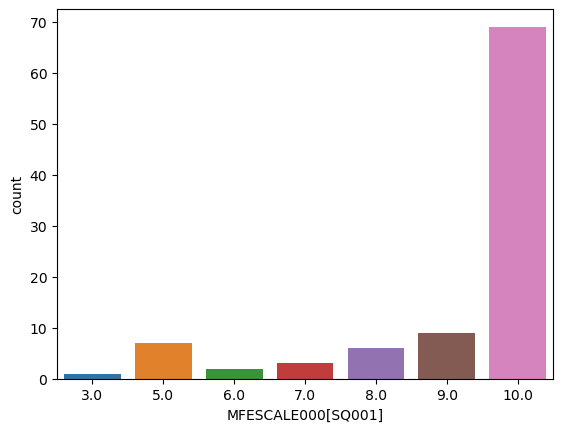

In [42]:
# plot the distribution of the MFESCALE
sns.countplot(x='MFESCALE000[SQ001]', data=mfescale)


In [ ]:
# Use Row-wise K-nn imputation to impute the missing values in the mfescale sub-dataset
from sklearn.impute import KNNImputer

# Transpose the mfescale sub-dataset so that the rows become columns and vice-versa
mfescale_transposed = mfescale.transpose()

# Instantiate the KNNImputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')
mfescale_imputed_transposed = imputer.fit_transform(mfescale_transposed)

# Transpose back to the original
mfescale_imputed = pd.DataFrame(mfescale_imputed_transposed).transpose()
mfescale_imputed.columns = mfescale.columns

# mfescale_imputed
mfescale_imputed.head(10)



<Axes: xlabel='MFESCALE000[SQ001]', ylabel='count'>

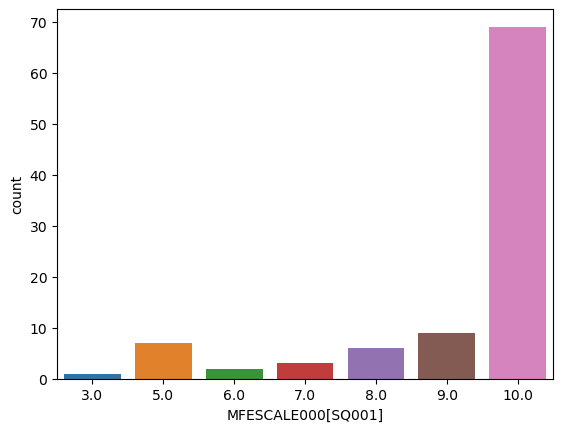

In [44]:
sns.countplot(x='MFESCALE000[SQ001]', data=mfescale_imputed)

In [45]:
# Replace the values of mfescale with the imputed values
data[mfescale.columns] = mfescale_imputed[mfescale.columns]

In [46]:
mfescale.head(10)

,MFESCALE000[SQ001],MFESCALE000[SQ002],MFESCALE000[SQ003],MFESCALE000[SQ004],MFESCALE000[SQ005],MFESCALE000[SQ006],MFESCALE000[SQ007],MFESCALE000[SQ008],MFESCALE000[SQ009],MFESCALE000[SQ010],MFESCALE000[SQ011],MFESCALE000[SQ012],MFESCALE000[SQ013],MFESCALE000[SQ014]
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,6.0,6.0,10.0,10.0,8.0,10.0,10.0,9.0,10.0,10.0,4.0,10.0,10.0,10.0
2,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
5,8.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,9.0,10.0,8.0,10.0,8.0
6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
7,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
8,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
9,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [47]:
# Find the average of the imputed values and add it to a new column name 'AVG_CONFIDENCE' with 1 decimal place
mfescale_imputed['AVG_CONFIDENCE'] = mfescale_imputed.mean(axis=1).round(1)

# mfescale_imputed
mfescale_imputed.head()

,MFESCALE000[SQ001],MFESCALE000[SQ002],MFESCALE000[SQ003],MFESCALE000[SQ004],MFESCALE000[SQ005],MFESCALE000[SQ006],MFESCALE000[SQ007],MFESCALE000[SQ008],MFESCALE000[SQ009],MFESCALE000[SQ010],MFESCALE000[SQ011],MFESCALE000[SQ012],MFESCALE000[SQ013],MFESCALE000[SQ014],AVG_CONFIDENCE
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,6.0,6.0,10.0,10.0,8.0,10.0,10.0,9.0,10.0,10.0,4.0,10.0,10.0,10.0,8.8
2,9.0,9.0,9.0,9.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.6
3,10.0,10.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.9
4,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [50]:
# Drop all the columns except 'AVG_CONFIDENCE'
mfescale_imputed.drop(mfescale_imputed.columns.difference(['AVG_CONFIDENCE']), axis=1, inplace=True)

# mfescale_imputed
mfescale_imputed.head()

,AVG_CONFIDENCE
0,10.0
1,8.8
2,9.6
3,9.9
4,10.0


In [52]:
# Drop all the columns in mfescale and replace them by AVG_CONFIDENCE OF mfescale_imputed
data.drop(mfescale.columns, axis=1, inplace=True)
data = data.join(mfescale_imputed)


In [53]:
# data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 1057 entries, Foldername to AVG_CONFIDENCE
dtypes: float64(502), int64(554), object(1)
memory usage: 801.1+ KB


### SF36

In [105]:
sf36_original = sub_datasets['SF36']
sf36_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3601         87 non-null     float64
 1   SF3602         87 non-null     float64
 2   SF3603[SQ001]  87 non-null     float64
 3   SF3603[SQ002]  87 non-null     float64
 4   SF3603[SQ003]  87 non-null     float64
 5   SF3603[SQ004]  87 non-null     float64
 6   SF3603[SQ005]  87 non-null     float64
 7   SF3603[SQ006]  87 non-null     float64
 8   SF3603[SQ007]  87 non-null     float64
 9   SF3603[SQ008]  87 non-null     float64
 10  SF3603[SQ009]  87 non-null     float64
 11  SF3603[SQ010]  87 non-null     float64
 12  SF3604[SQ001]  87 non-null     float64
 13  SF3604[SQ002]  87 non-null     float64
 14  SF3604[SQ003]  87 non-null     float64
 15  SF3604[SQ004]  87 non-null     float64
 16  SF3605[SQ001]  87 non-null     float64
 17  SF3605[SQ002]  87 non-null     float64
 18  SF3605[SQ003

In [76]:
sf36.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3601         87 non-null     float64
 1   SF3602         87 non-null     float64
 2   SF3603[SQ001]  87 non-null     float64
 3   SF3603[SQ002]  87 non-null     float64
 4   SF3603[SQ003]  87 non-null     float64
 5   SF3603[SQ004]  87 non-null     float64
 6   SF3603[SQ005]  87 non-null     float64
 7   SF3603[SQ006]  87 non-null     float64
 8   SF3603[SQ007]  87 non-null     float64
 9   SF3603[SQ008]  87 non-null     float64
 10  SF3603[SQ009]  87 non-null     float64
 11  SF3603[SQ010]  87 non-null     float64
 12  SF3604[SQ001]  87 non-null     float64
 13  SF3604[SQ002]  87 non-null     float64
 14  SF3604[SQ003]  87 non-null     float64
 15  SF3604[SQ004]  87 non-null     float64
 16  SF3605[SQ001]  87 non-null     float64
 17  SF3605[SQ002]  87 non-null     float64
 18  SF3605[SQ003

In [77]:
# Analyse all the columns starting with 'SF3603' as subdataset of sf36
sf36_03 = sf36[[col for col in sf36.columns if col.startswith('SF3603')]]

# sf36_03
sf36_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3603[SQ001]  87 non-null     float64
 1   SF3603[SQ002]  87 non-null     float64
 2   SF3603[SQ003]  87 non-null     float64
 3   SF3603[SQ004]  87 non-null     float64
 4   SF3603[SQ005]  87 non-null     float64
 5   SF3603[SQ006]  87 non-null     float64
 6   SF3603[SQ007]  87 non-null     float64
 7   SF3603[SQ008]  87 non-null     float64
 8   SF3603[SQ009]  87 non-null     float64
 9   SF3603[SQ010]  87 non-null     float64
dtypes: float64(10)
memory usage: 7.7 KB


In [79]:
# Total score for each patient if the patient has NaN values in every column, then the total score is NaN
sf36_03['SF3603_SCORE'] = sf36_03.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)


C:\Users\matth\AppData\Local\Temp\ipykernel_8924\4010493013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_03['SF3603_SCORE'] = sf36_03.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)


In [ ]:
sf36_03.drop(sf36_03.columns.difference(['SF3603_SCORE']), axis=1, inplace=True)

In [87]:
# Drop all the columns starting with 'SF3603'
sf36.drop([col for col in sf36.columns if col.startswith('SF3603')], axis=1, inplace=True)

In [89]:
# join sf36_03 with sf36
sf36 = sf36.join(sf36_03)

In [90]:
sf36.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3601         87 non-null     float64
 1   SF3602         87 non-null     float64
 2   SF3604[SQ001]  87 non-null     float64
 3   SF3604[SQ002]  87 non-null     float64
 4   SF3604[SQ003]  87 non-null     float64
 5   SF3604[SQ004]  87 non-null     float64
 6   SF3605[SQ001]  87 non-null     float64
 7   SF3605[SQ002]  87 non-null     float64
 8   SF3605[SQ003]  87 non-null     float64
 9   SF3606         87 non-null     float64
 10  SF3607         87 non-null     float64
 11  SF3608         86 non-null     float64
 12  SF3609[SQ001]  87 non-null     float64
 13  SF3609[SQ002]  87 non-null     float64
 14  SF3609[SQ003]  87 non-null     float64
 15  SF3609[SQ004]  87 non-null     float64
 16  SF3609[SQ005]  86 non-null     float64
 17  SF3609[SQ006]  87 non-null     float64
 18  SF3609[SQ007

In [91]:
# Analyse all the columns starting with 'SF3604' as subdataset of sf36
sf36_04 = sf36[[col for col in sf36.columns if col.startswith('SF3604')]]

# sf36_04
sf36_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3604[SQ001]  87 non-null     float64
 1   SF3604[SQ002]  87 non-null     float64
 2   SF3604[SQ003]  87 non-null     float64
 3   SF3604[SQ004]  87 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


In [92]:
# Total score for each patient if the patient has NaN values in every column, then the total score is NaN
sf36_04['SF3604_SCORE'] = sf36_04.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)


C:\Users\matth\AppData\Local\Temp\ipykernel_8924\1019610535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_04['SF3604_SCORE'] = sf36_04.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)


In [93]:
sf36_04.drop(sf36_04.columns.difference(['SF3604_SCORE']), axis=1, inplace=True)

C:\Users\matth\AppData\Local\Temp\ipykernel_8924\3884157151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_04.drop(sf36_04.columns.difference(['SF3604_SCORE']), axis=1, inplace=True)


In [96]:
# Drop all the columns starting with 'SF3604'
sf36.drop([col for col in sf36.columns if col.startswith('SF3604')], axis=1, inplace=True)

In [97]:
# join sf36_04 with sf36
sf36 = sf36.join(sf36_04)

In [98]:
sf36.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3601         87 non-null     float64
 1   SF3602         87 non-null     float64
 2   SF3605[SQ001]  87 non-null     float64
 3   SF3605[SQ002]  87 non-null     float64
 4   SF3605[SQ003]  87 non-null     float64
 5   SF3606         87 non-null     float64
 6   SF3607         87 non-null     float64
 7   SF3608         86 non-null     float64
 8   SF3609[SQ001]  87 non-null     float64
 9   SF3609[SQ002]  87 non-null     float64
 10  SF3609[SQ003]  87 non-null     float64
 11  SF3609[SQ004]  87 non-null     float64
 12  SF3609[SQ005]  86 non-null     float64
 13  SF3609[SQ006]  87 non-null     float64
 14  SF3609[SQ007]  86 non-null     float64
 15  SF3609[SQ008]  86 non-null     float64
 16  SF3609[SQ009]  87 non-null     float64
 17  SF3610         86 non-null     float64
 18  SF3611[SQ001

In [99]:
# Do the same analysis for sf36_05
sf36_05 = sf36[[col for col in sf36.columns if col.startswith('SF3605')]]

#  Total score for each patient if the patient has NaN values in every column, then the total score is NaN
sf36_05['SF3605_SCORE'] = sf36_05.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'SF3605_SCORE'
sf36_05.drop(sf36_05.columns.difference(['SF3605_SCORE']), axis=1, inplace=True)

# Drop all the columns starting with 'SF3605'
sf36.drop([col for col in sf36.columns if col.startswith('SF3605')], axis=1, inplace=True)

# join sf36_05 with sf36
sf36 = sf36.join(sf36_05)

sf36.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3601         87 non-null     float64
 1   SF3602         87 non-null     float64
 2   SF3606         87 non-null     float64
 3   SF3607         87 non-null     float64
 4   SF3608         86 non-null     float64
 5   SF3609[SQ001]  87 non-null     float64
 6   SF3609[SQ002]  87 non-null     float64
 7   SF3609[SQ003]  87 non-null     float64
 8   SF3609[SQ004]  87 non-null     float64
 9   SF3609[SQ005]  86 non-null     float64
 10  SF3609[SQ006]  87 non-null     float64
 11  SF3609[SQ007]  86 non-null     float64
 12  SF3609[SQ008]  86 non-null     float64
 13  SF3609[SQ009]  87 non-null     float64
 14  SF3610         86 non-null     float64
 15  SF3611[SQ001]  86 non-null     float64
 16  SF3611[SQ002]  87 non-null     float64
 17  SF3611[SQ003]  87 non-null     float64
 18  SF3611[SQ004

C:\Users\matth\AppData\Local\Temp\ipykernel_8924\1189405870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_05['SF3605_SCORE'] = sf36_05.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)
C:\Users\matth\AppData\Local\Temp\ipykernel_8924\1189405870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_05.drop(sf36_05.columns.difference(['SF3605_SCORE']), axis=1, inplace=True)


In [100]:
# Do the same analysis for sf36_09
sf36_09 = sf36[[col for col in sf36.columns if col.startswith('SF3609')]]

#  Total score for each patient if the patient has NaN values in every column, then the total score is NaN
sf36_09['SF3609_SCORE'] = sf36_09.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'SF3609_SCORE'
sf36_09.drop(sf36_09.columns.difference(['SF3609_SCORE']), axis=1, inplace=True)

# Drop all the columns starting with 'SF3609'
sf36.drop([col for col in sf36.columns if col.startswith('SF3609')], axis=1, inplace=True)

# join sf36_09 with sf36
sf36 = sf36.join(sf36_09)

sf36.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SF3601         87 non-null     float64
 1   SF3602         87 non-null     float64
 2   SF3606         87 non-null     float64
 3   SF3607         87 non-null     float64
 4   SF3608         86 non-null     float64
 5   SF3610         86 non-null     float64
 6   SF3611[SQ001]  86 non-null     float64
 7   SF3611[SQ002]  87 non-null     float64
 8   SF3611[SQ003]  87 non-null     float64
 9   SF3611[SQ004]  87 non-null     float64
 10  SF3603_SCORE   87 non-null     float64
 11  SF3604_SCORE   87 non-null     float64
 12  SF3605_SCORE   87 non-null     float64
 13  SF3609_SCORE   87 non-null     float64
dtypes: float64(14)
memory usage: 10.7 KB


C:\Users\matth\AppData\Local\Temp\ipykernel_8924\1589745022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_09['SF3609_SCORE'] = sf36_09.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)
C:\Users\matth\AppData\Local\Temp\ipykernel_8924\1589745022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_09.drop(sf36_09.columns.difference(['SF3609_SCORE']), axis=1, inplace=True)


In [101]:
# Do the same analysis for sf36_11
sf36_11 = sf36[[col for col in sf36.columns if col.startswith('SF3611')]]

#  Total score for each patient if the patient has NaN values in every column, then the total score is NaN
sf36_11['SF3611_SCORE'] = sf36_11.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'SF3611_SCORE'
sf36_11.drop(sf36_11.columns.difference(['SF3611_SCORE']), axis=1, inplace=True)

# Drop all the columns starting with 'SF3611'
sf36.drop([col for col in sf36.columns if col.startswith('SF3611')], axis=1, inplace=True)

# join sf36_11 with sf36
sf36 = sf36.join(sf36_11)

sf36.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SF3601        87 non-null     float64
 1   SF3602        87 non-null     float64
 2   SF3606        87 non-null     float64
 3   SF3607        87 non-null     float64
 4   SF3608        86 non-null     float64
 5   SF3610        86 non-null     float64
 6   SF3603_SCORE  87 non-null     float64
 7   SF3604_SCORE  87 non-null     float64
 8   SF3605_SCORE  87 non-null     float64
 9   SF3609_SCORE  87 non-null     float64
 10  SF3611_SCORE  87 non-null     float64
dtypes: float64(11)
memory usage: 8.5 KB


C:\Users\matth\AppData\Local\Temp\ipykernel_8924\1241385268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_11['SF3611_SCORE'] = sf36_11.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)
C:\Users\matth\AppData\Local\Temp\ipykernel_8924\1241385268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf36_11.drop(sf36_11.columns.difference(['SF3611_SCORE']), axis=1, inplace=True)


In [102]:
# Total of columns SF3607 and SF3608 for each patient, if the patient has NaN values in every column, then the total score is NaN
sf36['SF3607_08'] = sf36[['SF3607', 'SF3608']].apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns SF3607 and SF3608
sf36.drop(['SF3607', 'SF3608'], axis=1, inplace=True)

sf36.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SF3601        87 non-null     float64
 1   SF3602        87 non-null     float64
 2   SF3606        87 non-null     float64
 3   SF3610        86 non-null     float64
 4   SF3603_SCORE  87 non-null     float64
 5   SF3604_SCORE  87 non-null     float64
 6   SF3605_SCORE  87 non-null     float64
 7   SF3609_SCORE  87 non-null     float64
 8   SF3611_SCORE  87 non-null     float64
 9   SF3607_08     87 non-null     float64
dtypes: float64(10)
memory usage: 7.7 KB


In [106]:
# Drop all the SF36 columns from the main dataset
data.drop(sf36_original.columns, axis=1, inplace=True)
# join sf36 with the main dataset
data = data.join(sf36)


In [111]:
# Drop 'GFST' and 'FRAGIRE18[SQ001]' from the main dataset
data.drop(['GFST', 'FRAGIRE18[SQ001]'], axis=1, inplace=True)


In [115]:
# Drop 'ABILYCARE' and 'ABILYCARE2' from the main dataset
data.drop(['ABILYCARE', 'ABILYCARE2'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 1027 entries, Foldername to SF3607_08
dtypes: float64(472), int64(554), object(1)
memory usage: 778.4+ KB


### VINCQ

In [116]:
vincq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VINCQ01NOTEINFO        91 non-null     float64
 1   VINCQ06CONSPATIENT     91 non-null     float64
 2   VINCQ32DDN             91 non-null     float64
 3   VINCQ04CRITINC[SQ001]  91 non-null     float64
 4   VINCQ04CRITINC[SQ002]  91 non-null     float64
 5   VINCQ04CRITINC[SQ003]  91 non-null     float64
 6   VINCQ05CRITEXC[SQ001]  91 non-null     float64
 7   VINCQ05CRITEXC[SQ002]  91 non-null     float64
 8   VINCQ05CRITEXC[SQ003]  91 non-null     float64
 9   VINCQ02LISTEPATIENT    91 non-null     float64
 10  VINCQ08                47 non-null     float64
 11  VINCQ031SEX[SQ001]     86 non-null     float64
 12  VINCQ031SEX[SQ002]     87 non-null     float64
dtypes: float64(13)
memory usage: 10.0 KB


In [117]:
# Drop all the columns starting with 'VINCQ' except 'VINCQ32DDN', VINCQ031SEX[SQ001]', 'VINCQ031SEX[SQ002]' from the main dataset
data.drop([col for col in data.columns if col.startswith('VINCQ') and not col.startswith('VINCQ32DDN') and not col.startswith('VINCQ031SEX[SQ001]') and not col.startswith('VINCQ031SEX[SQ002]')], axis=1, inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 1017 entries, Foldername to SF3607_08
dtypes: float64(462), int64(554), object(1)
memory usage: 770.8+ KB


### EPICES

In [121]:
epices = epice.copy()
epices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EPICE000[SQ001]  87 non-null     float64
 1   EPICE000[SQ002]  87 non-null     float64
 2   EPICE000[SQ003]  87 non-null     float64
 3   EPICE000[SQ004]  87 non-null     float64
 4   EPICE000[SQ005]  87 non-null     float64
 5   EPICE000[SQ006]  87 non-null     float64
 6   EPICE000[SQ007]  87 non-null     float64
 7   EPICE000[SQ008]  87 non-null     float64
 8   EPICE000[SQ009]  87 non-null     float64
 9   EPICE000[SQ010]  87 non-null     float64
dtypes: float64(10)
memory usage: 7.7 KB


In [122]:
# Epice_Score
epices['Epice_Score'] = epices.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'Epice_Score'
epices.drop(epices.columns.difference(['Epice_Score']), axis=1, inplace=True)

# Drop all the columns starting with 'EPICE'
data.drop([col for col in data.columns if col.startswith('EPICE')], axis=1, inplace=True)

# join epices with the main dataset
data = data.join(epices)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 1008 entries, Foldername to Epice_Score
dtypes: float64(453), int64(554), object(1)
memory usage: 764.0+ KB


### HADS

In [124]:
hads.info()
hadss = hads.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HADS001  87 non-null     float64
 1   HADS002  87 non-null     float64
 2   HADS003  87 non-null     float64
 3   HADS004  87 non-null     float64
 4   HADS005  87 non-null     float64
 5   HADS006  87 non-null     float64
 6   HADS007  87 non-null     float64
 7   HADS008  87 non-null     float64
 8   HADS009  87 non-null     float64
 9   HADS010  87 non-null     float64
 10  HADS011  86 non-null     float64
 11  HADS012  87 non-null     float64
 12  HADS013  87 non-null     float64
 13  HADS014  87 non-null     float64
dtypes: float64(14)
memory usage: 10.7 KB


In [125]:
# HADS_Score
hadss['HADS_Score'] = hadss.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'HADS_Score'
hadss.drop(hadss.columns.difference(['HADS_Score']), axis=1, inplace=True)

# Drop all the columns starting with 'HADS'
data.drop([col for col in data.columns if col.startswith('HADS')], axis=1, inplace=True)

# join hadss with the main dataset
data = data.join(hadss)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 995 entries, Foldername to HADS_Score
dtypes: float64(440), int64(554), object(1)
memory usage: 754.1+ KB


### FRAGIRE

In [126]:
fragire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FRAGIRE01[SQ001]             87 non-null     float64
 1   FRAGIRE02                    87 non-null     float64
 2   FRAGIRE04                    87 non-null     float64
 3   FRAGIRE05                    87 non-null     float64
 4   FRAGIRE06                    87 non-null     float64
 5   FRAGIRE06TEST1[SQ001_SQ001]  87 non-null     float64
 6   FRAGIRE06TEST1[SQ001_SQ002]  87 non-null     float64
 7   FRAGIRE06TEST1[SQ001_SQ003]  87 non-null     float64
 8   FRAGIRE06TEST1[SQ001_SQ004]  87 non-null     float64
 9   FRAGIRE07                    87 non-null     float64
 10  FRAGIRE08                    87 non-null     float64
 11  FRAGIRE09                    87 non-null     float64
 12  FRAGIRE10                    87 non-null     float64
 13  FRAGIRE11             

In [127]:
# Fragire_Score
fragire['Fragire_Score'] = fragire.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'Fragire_Score'
fragire.drop(fragire.columns.difference(['Fragire_Score']), axis=1, inplace=True)

# Drop all the columns starting with 'FRAGIRE'
data.drop([col for col in data.columns if col.startswith('FRAGIRE')], axis=1, inplace=True)

# join fragire with the main dataset
data = data.join(fragire)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 977 entries, Foldername to Fragire_Score
dtypes: float64(422), int64(554), object(1)
memory usage: 740.5+ KB


### SAPASDEMORAN

In [128]:
sapas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SAPASDEMORAN[SQ001]  87 non-null     float64
 1   SAPASDEMORAN[SQ002]  87 non-null     float64
 2   SAPASDEMORAN[SQ003]  87 non-null     float64
 3   SAPASDEMORAN[SQ004]  86 non-null     float64
 4   SAPASDEMORAN[SQ005]  87 non-null     float64
 5   SAPASDEMORAN[SQ006]  87 non-null     float64
 6   SAPASDEMORAN[SQ007]  87 non-null     float64
 7   SAPASDEMORAN[SQ008]  87 non-null     float64
dtypes: float64(8)
memory usage: 6.2 KB


In [129]:
# SAPAS_Score
sapas['SAPAS_Score'] = sapas.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'SAPAS_Score'
sapas.drop(sapas.columns.difference(['SAPAS_Score']), axis=1, inplace=True)

# Drop all the columns starting with 'SAPAS'
data.drop([col for col in data.columns if col.startswith('SAPAS')], axis=1, inplace=True)

# join sapas with the main dataset
data = data.join(sapas)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 970 entries, Foldername to SAPAS_Score
dtypes: float64(415), int64(554), object(1)
memory usage: 735.2+ KB


### EXAMENCLIN

In [133]:
examclin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EXAMCLIN01               47 non-null     float64
 1   EXAMCLIN02               88 non-null     float64
 2   EXAMCLIN023              88 non-null     float64
 3   EXAMCLIN022              88 non-null     float64
 4   EXAMCLIN01[SQ001_SQ001]  88 non-null     float64
 5   EXAMCLIN01[SQ003_SQ001]  88 non-null     float64
dtypes: float64(6)
memory usage: 4.7 KB


In [157]:
# BMI 
data['BMI'] = data['EXAMCLIN01[SQ001_SQ001]'] / (data['EXAMCLIN01[SQ003_SQ001]'] ** 2)

### MMSE

In [161]:
mmse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MMSE03ORIENTATION2[SQ001]   14 non-null     float64
 1   MMSE03ORIENTATION2[SQ002]   14 non-null     float64
 2   MMSE03ORIENTATION2[SQ003]   15 non-null     float64
 3   MMSE03ORIENTATION2[SQ004]   15 non-null     float64
 4   MMSE03ORIENTATION2[SQ005]   14 non-null     float64
 5   MMSE03ORIENTATION3[SQ001]   77 non-null     float64
 6   MMSE03ORIENTATION3[SQ002]   77 non-null     float64
 7   MMSE03ORIENTATION3[SQ003]   77 non-null     float64
 8   MMSE03ORIENTATION3[SQ004]   77 non-null     float64
 9   MMSE03ORIENTATION3[SQ005]   77 non-null     float64
 10  MMSE04APPRENTISSAGE[SQ001]  77 non-null     float64
 11  MMSE04APPRENTISSAGE[SQ002]  77 non-null     float64
 12  MMSE04APPRENTISSAGE[SQ003]  77 non-null     float64
 13  MMSE05ATTETCALCUL[SQ001]    77 non-nu

In [162]:
# Drop all the columns starting with 'MMSE' except 'MMSE08SCORETOTAL'
data.drop([col for col in data.columns if col.startswith('MMSE') and not col.startswith('MMSE08SCORETOTAL')], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 941 entries, Foldername to BMI
dtypes: float64(386), int64(554), object(1)
memory usage: 713.2+ KB


### HHIE

In [163]:
hhie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HHIE01[SQ001]  77 non-null     float64
 1   HHIE01[SQ002]  77 non-null     float64
 2   HHIE01[SQ003]  77 non-null     float64
 3   HHIE01[SQ004]  77 non-null     float64
 4   HHIE01[SQ005]  77 non-null     float64
 5   HHIE01[SQ006]  77 non-null     float64
 6   HHIE01[SQ007]  77 non-null     float64
 7   HHIE01[SQ008]  77 non-null     float64
 8   HHIE01[SQ009]  77 non-null     float64
 9   HHIE01[SQ010]  75 non-null     float64
 10  HHIE02         77 non-null     float64
dtypes: float64(11)
memory usage: 8.5 KB


In [164]:
# Drop all the columns starting with 'HHIE' except 'HHIE02'
data.drop([col for col in data.columns if col.startswith('HHIE') and not col.startswith('HHIE02')], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 931 entries, Foldername to BMI
dtypes: float64(376), int64(554), object(1)
memory usage: 705.6+ KB


### MNA

In [166]:
mna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MNADEPISTAGEA        77 non-null     float64
 1   MNADEPISTAGEB        77 non-null     float64
 2   MNADEPISTAGEC        77 non-null     float64
 3   MNADEPISTAGED        77 non-null     float64
 4   MNADEPISTAGEE        77 non-null     float64
 5   MNADEPISTAGEF        77 non-null     float64
 6   MNADEPISTAGESCORE    77 non-null     float64
 7   MNAEVALGLOBALEN      9 non-null      float64
 8   MNAEVALGLOBALESCORE  9 non-null      float64
 9   MNASCORETOTAL        9 non-null      float64
dtypes: float64(10)
memory usage: 7.7 KB


In [167]:
# Drop all the columns starting with 'MNA' except 'MNADEPISTAGESCORE'
data.drop([col for col in data.columns if col.startswith('MNA') and not col.startswith('MNADEPISTAGESCORE')], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 922 entries, Foldername to BMI
dtypes: float64(367), int64(554), object(1)
memory usage: 698.8+ KB


### ACUITEVISUELLE

In [168]:
acuitevisuelle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACUITEVISUELLE01[SQ001]  67 non-null     float64
 1   ACUITEVISUELLE01[SQ002]  68 non-null     float64
 2   ACUITEVISUELLE01[SQ003]  70 non-null     float64
 3   ACUITEVISUELLE01[SQ004]  44 non-null     float64
 4   ACUITEVISUELLE01[SQ005]  43 non-null     float64
 5   ACUITEVISUELLE01[SQ006]  45 non-null     float64
 6   ACUITEVISUELLE3[SQ001]   71 non-null     float64
 7   ACUITEVISUELLE3[SQ002]   72 non-null     float64
 8   ACUITEVISUELLE3[SQ003]   72 non-null     float64
 9   ACUITEVISUELLE3[SQ004]   43 non-null     float64
 10  ACUITEVISUELLE3[SQ005]   43 non-null     float64
 11  ACUITEVISUELLE3[SQ006]   43 non-null     float64
dtypes: float64(12)
memory usage: 9.2 KB


In [169]:
# AcuiteVisuelle_Score
acuitevisuelle['AcuiteVisuelle_Score'] = acuitevisuelle.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'AcuiteVisuelle_Score'
acuitevisuelle.drop(acuitevisuelle.columns.difference(['AcuiteVisuelle_Score']), axis=1, inplace=True)

# Drop all the columns starting with 'ACUITEVISUELLE'
data.drop([col for col in data.columns if col.startswith('ACUITEVISUELLE')], axis=1, inplace=True)

# join acuitevisuelle with the main dataset
data = data.join(acuitevisuelle)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 911 entries, Foldername to AcuiteVisuelle_Score
dtypes: float64(356), int64(554), object(1)
memory usage: 690.5+ KB


### ICOPE

In [170]:
icope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ICOPE001          88 non-null     float64
 1   ICOPE003[SQ002]   88 non-null     float64
 2   ICOPE003[SQ003]   88 non-null     float64
 3   ICOPE0051[SQ001]  88 non-null     float64
 4   ICOPE0051[SQ002]  88 non-null     float64
 5   ICOPE0052         81 non-null     float64
 6   ICOPE004          88 non-null     float64
 7   ICOPE0041         87 non-null     float64
 8   ICOPE006[SQ001]   88 non-null     float64
 9   ICOPE006[SQ002]   88 non-null     float64
dtypes: float64(10)
memory usage: 7.7 KB


In [171]:
# Icope_Score
icope['Icope_Score'] = icope.apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Drop all the columns except 'Icope_Score'
icope.drop(icope.columns.difference(['Icope_Score']), axis=1, inplace=True)

# Drop all the columns starting with 'ICOPE'
data.drop([col for col in data.columns if col.startswith('ICOPE')], axis=1, inplace=True)

# join icope with the main dataset
data = data.join(icope)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 902 entries, Foldername to Icope_Score
dtypes: float64(347), int64(554), object(1)
memory usage: 683.7+ KB


### SPPB

In [172]:
sppb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPPB1   88 non-null     float64
 1   SPPB02  88 non-null     float64
 2   SPPB04  87 non-null     float64
 3   SPPB06  88 non-null     float64
 4   SPPB7   88 non-null     float64
 5   SPPB8   84 non-null     float64
 6   SPPB9   87 non-null     float64
dtypes: float64(7)
memory usage: 5.4 KB


In [ ]:
# SPPB_Pos_Score = SPPB01 + SPPB02 + SPPB04
sppb['SPPB_Pos_Score'] = sppb[['SPPB1', 'SPPB02', 'SPPB04']].apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# Join SPPB_Pos_Score with the main dataset
data = data.join(sppb['SPPB_Pos_Score'])



In [182]:
# drop SPPB01, SPPB02, SPPB04
data.drop(['SPPB1', 'SPPB02', 'SPPB04', 'SPPB8'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 899 entries, Foldername to SPPB_Pos_Score
dtypes: float64(344), int64(554), object(1)
memory usage: 681.4+ KB


### VINICODEX

In [183]:
vinicodex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VINICODEX001          88 non-null     float64
 1   VINICODEX002[SQ001]   88 non-null     float64
 2   VINICODEX002[SQ002]   88 non-null     float64
 3   VINICODEX002[SQ003]   88 non-null     float64
 4   VINICODEX002[SQ004]   88 non-null     float64
 5   VINICODEX003          88 non-null     float64
 6   VINICODEX0004[SQ006]  50 non-null     float64
 7   VINICODEX0004[SQ007]  50 non-null     float64
 8   VINICODEX0004[SQ008]  50 non-null     float64
 9   VINICODEX0004[SQ009]  49 non-null     float64
 10  VINICODEX0004[SQ010]  50 non-null     float64
dtypes: float64(11)
memory usage: 8.5 KB


In [184]:
# Drop all the columns starting with 'VINICODEX' except 'VINICODEX003'
data.drop([col for col in data.columns if col.startswith('VINICODEX') and not col.startswith('VINICODEX003')], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 889 entries, Foldername to SPPB_Pos_Score
dtypes: float64(334), int64(554), object(1)
memory usage: 673.8+ KB


### FROCOM

In [186]:
fropcom.info()
fropcom_original = fropcom.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FROPCOM0001         88 non-null     float64
 1   FROPCOM0002         38 non-null     float64
 2   FROPCOM0005         88 non-null     float64
 3   FROPCOM0006[S1]     82 non-null     float64
 4   FROPCOM0006[S2]     82 non-null     float64
 5   FROPCOM0006[S3]     82 non-null     float64
 6   FROPCOM0006[S4]     82 non-null     float64
 7   FROPCOM0006[S5]     86 non-null     float64
 8   FROPCOM0006[S6]     81 non-null     float64
 9   FROPCOM0006[S7]     80 non-null     float64
 10  FROPCOM0006[S8]     81 non-null     float64
 11  FROPCOM0007[SQ002]  88 non-null     float64
 12  FROPCOM0007[SQ003]  88 non-null     float64
 13  FROPCOM0007[SQ004]  88 non-null     float64
 14  FROPCOM0007[SQ005]  87 non-null     float64
 15  FROPCOM0007[SQ006]  86 non-null     float64
 16  FROPCOM000

In [190]:
# FROPCOM006_Score : the sum of all the columns starting with 'FROPCOM006'
fropcom['FROPCOM0006_Score'] = fropcom[[col for col in fropcom.columns if col.startswith('FROPCOM0006')]].apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# FROPCOM007_Score : the sum of all the columns starting with 'FROPCOM007'
fropcom['FROPCOM0007_Score'] = fropcom[[col for col in fropcom.columns if col.startswith('FROPCOM0007')]].apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# FROPCOM008_Score : the sum of all the columns starting with 'FROPCOM008'
fropcom['FROPCOM0008_Score'] = fropcom[[col for col in fropcom.columns if col.startswith('FROPCOM0008')]].apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# FROPCOM012_Score : the sum of all the columns starting with 'FROPCOM012'
fropcom['FROPCOM0012_Score'] = fropcom[[col for col in fropcom.columns if col.startswith('FROPCOM0012')]].apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)

# FROPCOM026_Score : the sum of all the columns starting with 'FROPCOM026'
fropcom['FROPCOM0026_Score'] = fropcom[[col for col in fropcom.columns if col.startswith('FROPCOM0026')]].apply(lambda row: row.sum() if not row.isnull().all() else np.nan, axis=1)



In [195]:
# Join FROPCOM0006_Score, FROPCOM0007_Score, FROPCOM0008_Score, FROPCOM0012_Score, FROPCOM0026_Score with the main dataset
data = data.join(fropcom[['FROPCOM0006_Score', 'FROPCOM0007_Score', 'FROPCOM0008_Score', 'FROPCOM0012_Score', 'FROPCOM0026_Score']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 854 entries, Foldername to FROPCOM0026_Score
dtypes: float64(299), int64(554), object(1)
memory usage: 647.3+ KB


### GAIT FEATURES

In [197]:
gait_sub_dataset.info()
gaits = gait_sub_dataset.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 94 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AvgSpeed                 75 non-null     float64
 1   CycleVariability         75 non-null     float64
 2   DoubleStance             75 non-null     float64
 3   MeanStepDuration         75 non-null     float64
 4   RoliTronc                75 non-null     float64
 5   Smo_Ent_AccXWaist        75 non-null     float64
 6   Smo_Ent_AccYWaist        75 non-null     float64
 7   Smo_Ent_AccZWaist        75 non-null     float64
 8   Smo_Ent_GyrXWaist        75 non-null     float64
 9   Smo_Ent_GyrYWaist        75 non-null     float64
 10  Smo_Ent_GyrZWaist        75 non-null     float64
 11  Smo_ROM_anML             75 non-null     float64
 12  Spr_SteT                 75 non-null     float64
 13  Spr_SwT_L                75 non-null     float64
 14  Spr_SwT_R                75 

In [198]:
# Features to keep
gait_features_to_keep = [
    'AvgSpeed',
    'CycleVariability',
    'DoubleStance',
    'MeanStepDuration',
    'RoliTronc',
    'Springiness', 'Sturdiness', 'Smoothness', 'Steadiness', 'Stability','Symmetry', 'Synchronisation']


In [199]:
# Drop all the columns except the columns in gait_features_to_keep
gaits.drop(gaits.columns.difference(gait_features_to_keep), axis=1, inplace=True)

In [200]:
gaits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AvgSpeed          75 non-null     float64
 1   CycleVariability  75 non-null     float64
 2   DoubleStance      75 non-null     float64
 3   MeanStepDuration  75 non-null     float64
 4   RoliTronc         75 non-null     float64
 5   Springiness       75 non-null     float64
 6   Sturdiness        75 non-null     float64
 7   Smoothness        75 non-null     float64
 8   Steadiness        75 non-null     float64
 9   Stability         75 non-null     float64
 10  Symmetry          75 non-null     float64
 11  Synchronisation   75 non-null     float64
dtypes: float64(12)
memory usage: 9.2 KB


In [201]:
# Drop all the columns of gait_sub_dataset from the main dataset
data.drop(gait_sub_dataset.columns, axis=1, inplace=True)

# join gaits with the main dataset
data = data.join(gaits)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 772 entries, Foldername to Synchronisation
dtypes: float64(217), int64(554), object(1)
memory usage: 585.2+ KB


In [208]:
# save the data to an excel file
data.to_excel('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v2.xlsx', index=False)

### Posture

In [13]:
file_path = 'P:/DATA_OCT_22/Stade_ 1_Merged_dataset/data_20221004.csv'
data_20221004 = pd.read_csv(file_path)
data_20221004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  231 non-null    int64  
 1   foldernumber                        228 non-null    object 
 2   gender                              231 non-null    object 
 3   lateralization                      231 non-null    object 
 4   consultation id                     231 non-null    int64  
 5   date                                231 non-null    object 
 6   height                              231 non-null    int64  
 7   weight                              231 non-null    float64
 8   measured weight                     129 non-null    float64
 9   fragility score                     231 non-null    int64  
 10  bilan id                            231 non-null    int64  
 11  bilan type                          231 non-n

In [204]:
data_20221004.head()

,id,foldernumber,gender,lateralization,consultation id,date,height,weight,measured weight,fragility score,bilan id,bilan type,grip left hand V1,grip left hand V2,grip right hand V1,grip right hand V2,romberg FootwearId,romberg EyesOpenSpeed,romberg EyesClosedSpeed,romberg EyesOpenSurface,romberg EyesClosedSurface,romberg EyesOpenSwayDensity,romberg EyesClosedSwayDensity,romberg EyesOpenLateralVariance,romberg EyesClosedLateralVariance,romberg EyesOpenScore,romberg EyesClosedScore,romberg StablizationHelpId,romberg Duration,romberg EyesOpenBalanceQuality,romberg EyesClosedBalanceQuality,romberg WalkingQuality,romberg EverydayBalance,locomotion FootwearId,locomotion AverageSpeed,locomotion MeanStepDuration,locomotion SwingMeanStrideDuration,locomotion DoubleStance,locomotion CycleVariability,locomotion TrunkRoll,locomotion StablizationHelpId
0,930,LEG002SPA,M,B,1436,2021-10-06 05:26:05,169,122.9,NaN,0,3931,4,NaN,NaN,NaN,NaN,2.0,1.022914,2.236422,0.662038,2.493080,29.84,29.84,0.000793,0.005900,99.0,93.0,0.0,30.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,930,LEG002SPA,M,B,2346,2022-05-31 11:46:58,169,122.9,NaN,0,5693,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.158087,0.504687,0.051588,0.273834,0.182451,0.103877,0.0
2,998,LEG001DPA,M,D,1551,2021-10-28 10:42:06,165,80.0,80.0,0,4324,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.791670,0.671667,0.001379,0.251927,0.233772,0.101404,0.0
3,998,LEG001DPA,M,D,1551,2021-10-28 10:42:06,165,80.0,80.0,0,4325,4,NaN,NaN,NaN,NaN,3.0,1.369443,1.708356,2.828660,5.058419,29.68,29.84,0.002427,0.007643,89.0,97.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,998,LEG001DPA,M,D,2343,2022-05-24 11:50:51,165,80.0,NaN,0,5687,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.962929,0.589667,-0.020028,0.259571,0.223706,0.090881,0.0


In [205]:
# Merge the duplicate rows
def merge_rows_with_more_data(group):
    """
    In this code, the merge_rows_with_more_data function goes through each row in a group and uses
    the combine_first method to fill in null values in the base row with values from the current row. 
    This is done for each column in the DataFrame. The result is a DataFrame where each group of duplicate rows
    has been merged into a single row, with each column containing the first non-null value found in the duplicate rows.

    """
    # Use the first row as the base
    base_row = group.iloc[0]
    
    # Iterate over the rest of the rows in the group
    for i in range(1, len(group)):
        # Use combine_first to fill in null values in the base row with values from the current row
        base_row = base_row.combine_first(group.iloc[i])
    
    # Return the merged row
    return base_row

In [ ]:
# Group the DataFrame by 'foldernumber' column
grouped = data_20221004.groupby('foldernumber')

# Apply the merge_rows_with_more_data function to each group
merged_df = grouped.apply(merge_rows_with_more_data).reset_index(drop=True)

# Print the merged DataFrame
print(merged_df)

In [207]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  104 non-null    int64  
 1   foldernumber                        104 non-null    object 
 2   gender                              104 non-null    object 
 3   lateralization                      104 non-null    object 
 4   consultation id                     104 non-null    int64  
 5   date                                104 non-null    object 
 6   height                              104 non-null    int64  
 7   weight                              104 non-null    float64
 8   measured weight                     70 non-null     float64
 9   fragility score                     104 non-null    int64  
 10  bilan id                            104 non-null    int64  
 11  bilan type                          104 non-n

In [211]:
list_to_keep = list(data['Foldername'])
list_to_check = list(merged_df['foldernumber'])

In [212]:
# Check if the list_to_keep is in list_to_check
for i in list_to_keep:
    if i not in list_to_check:
        print(i)
        

FRA014GJ
FRA016GJ


In [213]:
# join list_to_keep with data_20221004
data_20221004 = data_20221004.join(pd.DataFrame(list_to_keep, columns=['Foldername']))

data_20221004.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  231 non-null    int64  
 1   foldernumber                        228 non-null    object 
 2   gender                              231 non-null    object 
 3   lateralization                      231 non-null    object 
 4   consultation id                     231 non-null    int64  
 5   date                                231 non-null    object 
 6   height                              231 non-null    int64  
 7   weight                              231 non-null    float64
 8   measured weight                     129 non-null    float64
 9   fragility score                     231 non-null    int64  
 10  bilan id                            231 non-null    int64  
 11  bilan type                          231 non-n

In [214]:
# Drop all rows that are not in the list_to_keep
data_20221004_v1 = data_20221004[data_20221004['Foldername'].isin(list_to_keep)]

data_20221004_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  97 non-null     int64  
 1   foldernumber                        96 non-null     object 
 2   gender                              97 non-null     object 
 3   lateralization                      97 non-null     object 
 4   consultation id                     97 non-null     int64  
 5   date                                97 non-null     object 
 6   height                              97 non-null     int64  
 7   weight                              97 non-null     float64
 8   measured weight                     49 non-null     float64
 9   fragility score                     97 non-null     int64  
 10  bilan id                            97 non-null     int64  
 11  bilan type                          97 non-null

In [215]:
# Drop some columns from data_20221004_v1 : 'id','foldernumber', 'lateralization', 'consultation id', 'date', 'bilan id', 'bilan type', 'grip left hand V1', 'grip left hand V2', 'grip right hand V1', 'grip right hand V2', 'romberg FootwearId', 'romberg EverydayBalance', 'locomotion FootwearId', 'locomotion StablizationHelpId'
data_20221004_v1.drop(['id','foldernumber', 'lateralization', 'consultation id', 'date', 'bilan id', 'bilan type', 'grip left hand V1', 'grip left hand V2', 'grip right hand V1', 'grip right hand V2', 'romberg FootwearId', 'romberg EverydayBalance', 'locomotion FootwearId', 'locomotion StablizationHelpId'], axis=1, inplace=True)

data_20221004_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gender                              97 non-null     object 
 1   height                              97 non-null     int64  
 2   weight                              97 non-null     float64
 3   measured weight                     49 non-null     float64
 4   fragility score                     97 non-null     int64  
 5   romberg EyesOpenSpeed               50 non-null     float64
 6   romberg EyesClosedSpeed             50 non-null     float64
 7   romberg EyesOpenSurface             50 non-null     float64
 8   romberg EyesClosedSurface           50 non-null     float64
 9   romberg EyesOpenSwayDensity         50 non-null     float64
 10  romberg EyesClosedSwayDensity       50 non-null     float64
 11  romberg EyesOpenLateralVariance     50 non-null

C:\Users\matth\AppData\Local\Temp\ipykernel_8924\2727022526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_20221004_v1.drop(['id','foldernumber', 'lateralization', 'consultation id', 'date', 'bilan id', 'bilan type', 'grip left hand V1', 'grip left hand V2', 'grip right hand V1', 'grip right hand V2', 'romberg FootwearId', 'romberg EverydayBalance', 'locomotion FootwearId', 'locomotion StablizationHelpId'], axis=1, inplace=True)


In [216]:
# Join data_20221004_v1 with data
data = data.join(data_20221004_v1.set_index('Foldername'), on='Foldername')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 798 entries, Foldername to locomotion TrunkRoll
dtypes: float64(240), int64(556), object(2)
memory usage: 604.9+ KB


In [ ]:
# save the data to an excel file
data.to_excel('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v3.xlsx', index=False)

### DATA_V3

In [3]:
data[['Foldername','EXAMCLIN01[SQ001_SQ001]', 'weight']]

,Foldername,EXAMCLIN01[SQ001_SQ001],weight
0,DUP002BME,74.0,122.9
1,FRA001AMA,74.0,122.9
2,FRA002CTI,89.0,80.0
3,FRA003BMG,63.0,80.0
4,FRA004LHN,68.0,80.0
...,...,...,...
92,LEG048VHI,50.3,69.0
93,LEG049FAL,NaN,69.0
94,LEG050LMN,42.0,69.0
95,MOU001NYA,83.0,62.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 787 entries, Foldername to romberg EyesClosedScore
dtypes: float64(229), int64(556), object(2)
memory usage: 596.5+ KB


In [ ]:
# Some columns to drop, height, weight, 

In [15]:
data_20221004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  231 non-null    int64  
 1   foldernumber                        228 non-null    object 
 2   gender                              231 non-null    object 
 3   lateralization                      231 non-null    object 
 4   consultation id                     231 non-null    int64  
 5   date                                231 non-null    object 
 6   height                              231 non-null    int64  
 7   weight                              231 non-null    float64
 8   measured weight                     129 non-null    float64
 9   fragility score                     231 non-null    int64  
 10  bilan id                            231 non-null    int64  
 11  bilan type                          231 non-n

In [17]:
# All the columns and rows in data_20221004 where 'foldernumber' == 'DUP002BME'
pd.set_option('display.max_columns', None)
data_20221004[data_20221004['foldernumber'] == 'DUP002BME']

,id,foldernumber,gender,lateralization,consultation id,date,height,weight,measured weight,fragility score,bilan id,bilan type,grip left hand V1,grip left hand V2,grip right hand V1,grip right hand V2,romberg FootwearId,romberg EyesOpenSpeed,romberg EyesClosedSpeed,romberg EyesOpenSurface,romberg EyesClosedSurface,romberg EyesOpenSwayDensity,romberg EyesClosedSwayDensity,romberg EyesOpenLateralVariance,romberg EyesClosedLateralVariance,romberg EyesOpenScore,romberg EyesClosedScore,romberg StablizationHelpId,romberg Duration,romberg EyesOpenBalanceQuality,romberg EyesClosedBalanceQuality,romberg WalkingQuality,romberg EverydayBalance,locomotion FootwearId,locomotion AverageSpeed,locomotion MeanStepDuration,locomotion SwingMeanStrideDuration,locomotion DoubleStance,locomotion CycleVariability,locomotion TrunkRoll,locomotion StablizationHelpId
221,1364,DUP002BME,F,B,2513,2022-08-22 08:10:03,152,74.0,NaN,0,5972,4,NaN,NaN,NaN,NaN,15.0,1.346763e-14,1.344427e-14,9.905157e-31,8.893556e-31,29.84,29.88,1.680999e-34,1.082434e-33,99.0,99.0,0.0,30.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1364,DUP002BME,F,B,2514,2022-08-22 08:14:58,152,74.0,NaN,0,5973,4,NaN,NaN,NaN,NaN,15.0,1.674877e+00,2.012107e+00,4.114994e+00,2.741771e+00,29.88,29.84,2.530153e-03,4.957484e-03,92.0,95.0,0.0,30.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# drop the last 15 columns from data
data.drop(data.columns[-15:], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 772 entries, Foldername to Synchronisation
dtypes: float64(217), int64(554), object(1)
memory usage: 585.2+ KB


In [ ]:
data_20221004.info()

In [22]:
file_path = 'P:/DATA_OCT_22/Stade_ 1_Merged_dataset/merged_data_20221004.csv'
merged_data_20221004 = pd.read_csv(file_path)
merged_data_20221004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  104 non-null    int64  
 1   foldernumber                        104 non-null    object 
 2   gender                              104 non-null    object 
 3   lateralization                      104 non-null    object 
 4   consultation id                     104 non-null    int64  
 5   date                                104 non-null    object 
 6   height                              104 non-null    int64  
 7   weight                              104 non-null    float64
 8   measured weight                     70 non-null     float64
 9   fragility score                     104 non-null    int64  
 10  bilan id                            104 non-null    int64  
 11  bilan type                          104 non-n

In [24]:
# All the columns and rows in data_20221004 where 'foldernumber' == 'DUP002BME'
pd.set_option('display.max_columns', None)
merged_data_20221004[merged_data_20221004['foldernumber'] == 'DUP002BME']

,id,foldernumber,gender,lateralization,consultation id,date,height,weight,measured weight,fragility score,bilan id,bilan type,grip left hand V1,grip left hand V2,grip right hand V1,grip right hand V2,romberg FootwearId,romberg EyesOpenSpeed,romberg EyesClosedSpeed,romberg EyesOpenSurface,romberg EyesClosedSurface,romberg EyesOpenSwayDensity,romberg EyesClosedSwayDensity,romberg EyesOpenLateralVariance,romberg EyesClosedLateralVariance,romberg EyesOpenScore,romberg EyesClosedScore,romberg StablizationHelpId,romberg Duration,romberg EyesOpenBalanceQuality,romberg EyesClosedBalanceQuality,romberg WalkingQuality,romberg EverydayBalance,locomotion FootwearId,locomotion AverageSpeed,locomotion MeanStepDuration,locomotion SwingMeanStrideDuration,locomotion DoubleStance,locomotion CycleVariability,locomotion TrunkRoll,locomotion StablizationHelpId
0,1364,DUP002BME,F,B,2513,2022-08-22 08:10:03,152,74.0,NaN,0,5972,4,NaN,NaN,NaN,NaN,15.0,1.346763e-14,1.344427e-14,9.905157e-31,8.893556e-31,29.84,29.88,1.680999e-34,1.082434e-33,99.0,99.0,0.0,30.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
file_path = 'P:/DATA_OCT_22/Stade_ 1_Merged_dataset/filtered_merged_data_20221004.csv'
filtered_merged_data_20221004 = pd.read_csv(file_path)
filtered_merged_data_20221004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  95 non-null     int64  
 1   Foldername                          95 non-null     object 
 2   gender                              95 non-null     object 
 3   lateralization                      95 non-null     object 
 4   consultation id                     95 non-null     int64  
 5   date                                95 non-null     object 
 6   height                              95 non-null     int64  
 7   weight                              95 non-null     float64
 8   measured weight                     65 non-null     float64
 9   fragility score                     95 non-null     int64  
 10  bilan id                            95 non-null     int64  
 11  bilan type                          95 non-null

In [29]:
# All the columns and rows in data_20221004 where 'foldernumber' == 'DUP002BME'
pd.set_option('display.max_columns', None)
filtered_merged_data_20221004.head(10)

,id,Foldername,gender,lateralization,consultation id,date,height,weight,measured weight,fragility score,bilan id,bilan type,grip left hand V1,grip left hand V2,grip right hand V1,grip right hand V2,romberg FootwearId,romberg EyesOpenSpeed,romberg EyesClosedSpeed,romberg EyesOpenSurface,romberg EyesClosedSurface,romberg EyesOpenSwayDensity,romberg EyesClosedSwayDensity,romberg EyesOpenLateralVariance,romberg EyesClosedLateralVariance,romberg EyesOpenScore,romberg EyesClosedScore,romberg StablizationHelpId,romberg Duration,romberg EyesOpenBalanceQuality,romberg EyesClosedBalanceQuality,romberg WalkingQuality,romberg EverydayBalance,locomotion FootwearId,locomotion AverageSpeed,locomotion MeanStepDuration,locomotion SwingMeanStrideDuration,locomotion DoubleStance,locomotion CycleVariability,locomotion TrunkRoll,locomotion StablizationHelpId
0,1364,DUP002BME,F,B,2513,2022-08-22 08:10:03,152,74.0,NaN,0,5972,4,NaN,NaN,NaN,NaN,15.0,1.346763e-14,1.344427e-14,9.905157e-31,8.893556e-31,29.840000,29.880000,1.680999e-34,1.082434e-33,99.0,99.0,0.0,30.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1174,FRA001AMA,F,D,2077,2022-03-31 08:32:38,160,74.0,76.0,0,5216,1,20.3,21.5,14.0,19.3,15.0,9.439242e-01,1.675979e+00,1.199470e+00,1.108129e+01,29.800000,27.130802,1.338352e-03,1.246047e-02,98.0,88.0,0.0,30.0,3.0,3.0,3.0,NaN,3.0,0.880744,0.564857,-0.053907,0.229752,0.197969,0.096065,0.0
2,1173,FRA002CTI,F,B,2067,2022-03-29 07:28:35,151,89.0,89.0,0,5206,4,23.2,19.9,22.5,19.1,15.0,1.053245e+00,2.412384e+00,7.086523e-01,3.256751e+00,29.800000,29.880000,6.738724e-04,7.077824e-03,99.0,81.0,0.0,30.0,3.0,3.0,3.0,NaN,5.0,1.247801,0.500417,0.023122,0.254313,0.196011,0.387144,0.0
3,1192,FRA003BMG,F,D,2124,2022-04-05 06:48:16,158,63.0,69.1,0,5285,1,17.7,15.2,14.9,17.4,15.0,9.613023e-01,1.062663e+00,2.183540e+00,6.011589e-01,30.440000,29.880000,2.395301e-03,1.533375e-03,99.0,99.0,0.0,30.0,3.0,3.0,3.0,NaN,5.0,0.942554,0.585556,-0.021565,0.208736,0.233782,0.100685,0.0
4,1193,FRA004LHN,M,D,2126,2022-04-05 08:03:45,174,68.0,71.5,0,5292,1,32.6,35.0,38.3,40.0,15.0,1.132915e+00,1.584358e+00,2.130130e+00,2.016143e+00,29.880000,29.880000,2.942435e-03,2.505740e-03,99.0,99.0,0.0,30.0,3.0,3.0,3.0,NaN,3.0,1.123115,0.563333,-0.007276,0.257278,0.229497,0.143611,0.0
5,1198,FRA005GMS,F,D,2128,2022-04-05 08:54:46,148,52.0,NaN,0,5298,1,11.1,11.9,12.1,12.6,15.0,5.719016e+01,2.136773e-13,9.151013e+02,2.045111e-28,4.750107,29.880000,1.043324e+00,5.938868e-32,10.0,99.0,0.0,30.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1194,FRA006PJA,M,D,2173,2022-04-08 05:04:48,165,69.0,73.0,0,5382,1,27.5,31.2,23.1,29.4,15.0,8.932748e-01,1.392605e+00,1.051996e+00,1.657443e+00,29.880000,29.880000,1.318395e-03,2.768819e-03,96.0,98.0,0.0,30.0,3.0,3.0,3.0,NaN,3.0,1.528142,0.483913,-0.011198,0.244459,0.207841,0.238904,0.0
7,1195,FRA007TTM,F,D,2175,2022-04-08 05:36:25,147,47.0,54.2,0,5386,1,14.1,12.8,12.5,12.3,15.0,1.012356e+00,1.373370e+00,9.396404e-01,7.411970e-01,29.880000,29.880000,7.197714e-04,3.166322e-03,99.0,99.0,0.0,30.0,3.0,3.0,3.0,NaN,3.0,1.247007,0.471724,0.067366,0.191285,0.191505,0.122090,0.0
8,1276,FRA008TJL,M,D,2274,2022-04-29 05:30:03,176,90.0,87.0,0,5557,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.555529,0.478261,0.040932,0.230462,0.196518,0.237192,0.0
9,1197,FRA009RMI,F,D,2180,2022-04-08 09:24:48,145,61.0,61.6,0,5397,1,11.8,14.6,10.5,14.9,15.0,1.222030e+00,1.455699e+00,3.239957e+00,1.477964e+00,29.880000,29.880000,1.312948e-03,1.481074e-03,96.0,91.0,0.0,30.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Join filtered_merged_data_20221004 with data
data_v4 = data.join(filtered_merged_data_20221004.set_index('Foldername'), on='Foldername')

data_v4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 812 entries, Foldername to locomotion StablizationHelpId
dtypes: float64(254), int64(554), object(4)
memory usage: 615.5+ KB


In [32]:
# save the data to an excel file
data_v4.to_excel('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v4.xlsx', index=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 124 entries, Foldername to Frailty_State
dtypes: float64(119), int64(3), object(2)
memory usage: 94.1+ KB


In [4]:
# Drop columns with 50% or more missing values
data = data.dropna(thresh=len(data) * 0.5, axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 116 entries, Foldername to Frailty_State
dtypes: float64(111), int64(3), object(2)
memory usage: 88.0+ KB


In [15]:
list(data.columns)

['Foldername',
 'VINCQ32DDN',
 'VINICODEX003',
 'FROPCOM0001',
 'FROPCOM0005',
 'FROPCOM0006[S1]',
 'FROPCOM0006[S2]',
 'FROPCOM0006[S3]',
 'FROPCOM0006[S4]',
 'FROPCOM0006[S5]',
 'FROPCOM0006[S6]',
 'FROPCOM0006[S7]',
 'FROPCOM0006[S8]',
 'FROPCOM0006_Total',
 'FROPCOM0007[SQ002]',
 'FROPCOM0007[SQ003]',
 'FROPCOM0007[SQ004]',
 'FROPCOM0007[SQ005]',
 'FROPCOM0007[SQ006]',
 'FROPCOM0007[SQ007]',
 'FROPCOM0007[SQ008]',
 'FROPCOM0007[SQ023]',
 'FROPCOM0007[SQ009]',
 'FROPCOM0007[SQ010]',
 'FROPCOM0007[SQ011]',
 'FROPCOM0007[SQ012]',
 'FROPCOM0007[SQ013]',
 'FROPCOM0007[SQ014]',
 'FROPCOM0007[SQ015]',
 'FROPCOM0007[SQ016]',
 'FROPCOM0007[SQ017]',
 'FROPCOM0007[SQ018]',
 'FROPCOM0007[SQ019]',
 'FROPCOM0007[SQ020]',
 'FROPCOM0007[SQ021]',
 'FROPCOM0007[SQ024]',
 'FROPCOM0007[SQ022]',
 'FROPCOM0007_Total',
 'FROPCOM0008[SQ001]',
 'FROPCOM0008[SQ002]',
 'FROPCOM0009',
 'FROPCOM0010',
 'FROPCOM0012[SQ001]',
 'FROPCOM0012[SQ002]',
 'FROPCOM0013',
 'FROPCOM0014',
 'FROPCOM0016',
 'FROPCOM0017',


In [6]:
# One-Hot Encoding of Gender
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 116 entries, Foldername to Gender_M
dtypes: float64(111), int64(3), object(1), uint8(1)
memory usage: 87.4+ KB


In [11]:
# convert Height from cm to m
data['Height'] = data['Height'] / 100

data[['Foldername', 'Height']].head(10)

,Foldername,Height
0,DUP002BME,1.52
1,FRA001AMA,1.60
2,FRA002CTI,1.51
3,FRA003BMG,1.58
4,FRA004LHN,1.74
5,FRA005GMS,1.48
6,FRA006PJA,1.65
7,FRA007TTM,1.47
8,FRA008TJL,1.76
9,FRA009RMI,1.45


In [12]:
# BMI
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

data[['Foldername', 'BMI']].head(10)

,Foldername,BMI
0,DUP002BME,32.029086
1,FRA001AMA,28.906250
2,FRA002CTI,39.033376
3,FRA003BMG,25.236340
4,FRA004LHN,22.460034
5,FRA005GMS,23.739956
6,FRA006PJA,25.344353
7,FRA007TTM,21.750197
8,FRA008TJL,29.054752
9,FRA009RMI,29.013080


In [ ]:
# difference of past_weight and Weight. If past_weight is NaN, then the difference is NaN. If the difference is negative, then the patient has lost weight, else the patient has gained weight
data['Weight_Diff'] = data['Weight'] - data['Past_Weight']

data[['Foldername', 'Weight_Diff']].head(35)

In [17]:
# Move'Frailty_Score' column to the end of the dataframe
data = data[[col for col in data.columns if col != 'Frailty_State'] + ['Frailty_State']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 118 entries, Foldername to Frailty_State
dtypes: float64(114), int64(2), object(1), uint8(1)
memory usage: 88.9+ KB


In [18]:
# save the data to an excel file
data.to_excel('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v5.xlsx', index=False)